In [1]:
import matplotlib.pyplot as plt

def visualize_image(image):
    image_p = image.permute((1, 2, 0)).detach().numpy()

    plt.imshow(image_p)
    plt.axis('off')
    plt.show()

In [2]:
from dataset import ImageDataset, EmbeddingDataset, ImageEmbeddingDataset

root_dir = "data/UCSDped1/Train"
seq_len = 50

image_dataset = ImageDataset(
    root_dir=root_dir,
    seq_len=seq_len
)

embedding_dataset = EmbeddingDataset(
    embeddings_path="embeddings/embeddings_50.pkl"
)

dataset = ImageEmbeddingDataset(
    image_dataset=image_dataset,
    embedding_dataset=embedding_dataset
)
dataset[0][0].shape, dataset[0][1].shape

(torch.Size([50, 768]), torch.Size([50, 3, 224, 224]))

In [3]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=5)
data = next(iter(dataloader))
data[0].shape, data[1].shape

(torch.Size([5, 50, 768]), torch.Size([5, 50, 3, 224, 224]))

In [5]:
from models import FrameReconstructionModel

model = FrameReconstructionModel()

In [6]:
out = model(data[0])

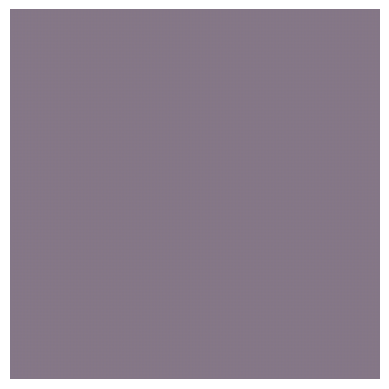

In [7]:
visualize_image(out[0][0])

In [8]:
import torch
from tqdm import tqdm

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


def train_one_epoch():
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in tqdm(enumerate(dataloader)):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

In [9]:
for epoch in range(10):
    print(f"Epoch {epoch}")
    avg_loss = train_one_epoch()

Epoch 0


23it [08:30, 22.20s/it]


KeyboardInterrupt: 